<a href="https://colab.research.google.com/github/Amaka29/Projects/blob/main/WHO_Health_System_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
!pip install geopandas folium
import folium
from scipy.stats import pearsonr


In [2]:
# Define the URL of the web page I want to scrape
url = "https://en.m.wikipedia.org/wiki/World_Health_Organization_ranking_of_health_systems_in_2000"



In [3]:
# Send an HTTP request to the URL and get the page content
response = requests.get(url)
print(response)

<Response [200]>


In [4]:
# Parse the HTML content of the page using Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
# Find the table with the desired class

table = soup.find('table', class_ = 'wikitable sortable')
print(table)

<table class="wikitable sortable"><tbody><tr><th>Country
</th>
<th>Attainment of goals / Health / Level (DALE)
</th>
<th>Attainment of goals / Health / Distribution
</th>
<th>Attainment of goals / Health / Overall goal attainment
</th>
<th>Health expenditure per capita in international dollars
</th>
<th>Performance / On level of health
</th>
<th>Performance / Overall health system performance
</th></tr><tr><td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Afghanistan" title="Afghanistan"><noscript><img alt="Afghanistan" class="mw-file-element" data-file-height="500" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/23px-Flag_of_the_Taliban.svg.png" width="23"/></noscript><span class="lazy-image-placeholder" data-alt="Afghanistan" data-class="mw-file-element" data-height="12" data-src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_the_Taliban.svg/23px-F

In [6]:
# Find table headers
header = soup.find_all('th')

In [7]:
header_title = [title.text for title in header]
print(header_title)

['Country\n', 'Attainment of goals / Health / Level (DALE)\n', 'Attainment of goals / Health / Distribution\n', 'Attainment of goals / Health / Overall goal attainment\n', 'Health expenditure per capita in international dollars\n', 'Performance / On level of health\n', 'Performance / Overall health system performance\n']


In [8]:
# To clean the titles
header_title = [title.text.strip() for title in header]
print(header_title)

['Country', 'Attainment of goals / Health / Level (DALE)', 'Attainment of goals / Health / Distribution', 'Attainment of goals / Health / Overall goal attainment', 'Health expenditure per capita in international dollars', 'Performance / On level of health', 'Performance / Overall health system performance']


In [9]:
# Create dataframe

df = pd.DataFrame(columns = header_title)
df

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance


In [10]:
# Create an empty list to store the data
data_list = []


In [12]:
# Iterate through the rows of the table
for row in table.find_all('tr'):
            # Extract data from each cell in the row
            cells = row.find_all('td')
            if len(cells) > 1:
                data = [data.text.strip() for data in cells]
                data_list.append(data)



In [13]:
 # Create a DataFrame from the data
df = pd.DataFrame(data_list, columns= header_title)

In [14]:
df

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
0,Afghanistan,164,0,183,184,150,173
1,Albania,102,128,86,149,64,55
2,Algeria,44,63,56,24,45,81
3,Andorra,10,25,17,23,7,4
4,Angola,165,178,181,164,165,181
...,...,...,...,...,...,...,...
377,Vietnam,116,104,140,147,130,160
378,Yemen,141,165,146,182,82,120
379,FR Yugoslavia,46,90,95,113,47,106
380,Zambia,188,171,174,148,190,182


## **Cleaning The Data**

In [16]:
# Checking for missing values in the DataFrame
missing_values = df.isna().sum()
missing_values

Country                                                   0
Attainment of goals / Health / Level (DALE)               0
Attainment of goals / Health / Distribution               0
Attainment of goals / Health / Overall goal attainment    0
Health expenditure per capita in international dollars    0
Performance / On level of health                          0
Performance / Overall health system performance           0
dtype: int64

In [17]:
# Get data types for all columns
data_types = df.dtypes

# Print the data types
print(data_types)

Country                                                   object
Attainment of goals / Health / Level (DALE)               object
Attainment of goals / Health / Distribution               object
Attainment of goals / Health / Overall goal attainment    object
Health expenditure per capita in international dollars    object
Performance / On level of health                          object
Performance / Overall health system performance           object
dtype: object


In [19]:
# Convert all columns except country column to numeric data type
# List of columns to convert to numeric
numeric_columns = df.columns.difference(["Country"])  # Exclude the "Country" column

# Convert the selected columns to numeric type
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Print the data types after conversion
print(df.dtypes)

Country                                                   object
Attainment of goals / Health / Level (DALE)                int64
Attainment of goals / Health / Distribution                int64
Attainment of goals / Health / Overall goal attainment     int64
Health expenditure per capita in international dollars     int64
Performance / On level of health                           int64
Performance / Overall health system performance            int64
dtype: object


In [20]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
duplicate_rows

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
191,Afghanistan,164,0,183,184,150,173
192,Albania,102,128,86,149,64,55
193,Algeria,44,63,56,24,45,81
194,Andorra,10,25,17,23,7,4
195,Angola,165,178,181,164,165,181
...,...,...,...,...,...,...,...
377,Vietnam,116,104,140,147,130,160
378,Yemen,141,165,146,182,82,120
379,FR Yugoslavia,46,90,95,113,47,106
380,Zambia,188,171,174,148,190,182


In [21]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Display the DataFrame after removing duplicates
df

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
0,Afghanistan,164,0,183,184,150,173
1,Albania,102,128,86,149,64,55
2,Algeria,44,63,56,24,45,81
3,Andorra,10,25,17,23,7,4
4,Angola,165,178,181,164,165,181
...,...,...,...,...,...,...,...
186,Vietnam,116,104,140,147,130,160
187,Yemen,141,165,146,182,82,120
188,FR Yugoslavia,46,90,95,113,47,106
189,Zambia,188,171,174,148,190,182


In [25]:
#Save data as csv file
# Specify the file path where you want to save the CSV file
file_path = "who_health_ranking.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude the index column

## **Descriptive Analysis**

In [22]:
df.describe()

,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
count,191.000000,191.000000,191.000000,191.000000,191.0000,191.000000
mean,95.167539,94.062827,95.774869,95.596859,96.0000,96.020942
std,55.582686,55.545678,55.356325,55.453155,55.2811,55.281096
min,1.000000,0.000000,1.000000,1.000000,1.0000,1.000000
25%,46.500000,46.500000,48.500000,48.500000,48.5000,48.500000
50%,95.000000,93.000000,95.000000,95.000000,96.0000,97.000000
75%,143.500000,141.500000,143.500000,143.500000,143.5000,143.500000
max,191.000000,191.000000,191.000000,191.000000,191.0000,191.000000


In [62]:
# Sort the DataFrame by the "Attainment of goals / Health / Level (DALE)" column
sorted_dale = df.sort_values(by="Attainment of goals / Health / Level (DALE)", ascending=True)

# Display the sorted and deduplicated DataFrame
sorted_dale

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
85,Japan,1,3,1,13,9,10
8,Australia,2,17,12,17,39,32
60,France,3,12,6,4,4,1
164,Sweden,4,28,4,7,21,23
159,Spain,5,11,19,24,6,7
...,...,...,...,...,...,...,...
22,Botswana,187,146,168,85,188,169
189,Zambia,188,171,174,148,190,182
102,Malawi,189,187,182,161,187,185
123,Niger,190,184,188,185,177,170


In [27]:
# Sort the DataFrame by the "Performance / Overall health system performance" column
sorted_health_system = df.sort_values(by="Performance / Overall health system performance", ascending=True)

# Display the sorted and deduplicated DataFrame
sorted_health_system

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
60,France,3,12,6,4,4,1
82,Italy,6,14,11,11,3,2
146,San Marino,11,9,21,21,5,3
3,Andorra,10,25,17,23,7,4
106,Malta,21,38,31,37,2,5
...,...,...,...,...,...,...,...
124,Nigeria,163,188,184,176,175,187
45,Democratic Republic of the Congo,174,174,179,188,185,188
32,Central African Republic,175,189,190,178,164,189
116,Myanmar,139,162,175,136,129,190


In [32]:
# Sort the DataFrame by the "Attainment of goals / Health / Distribution" column
sorted_health_dist = df.sort_values(by="Attainment of goals / Health / Distribution", ascending=True)

# Drop the row for Afghanistan (its ranking for this column reads 0)
country_to_drop = 'Afghanistan'
sorted_health_dist = sorted_health_dist.drop(sorted_health_dist[sorted_health_dist['Country'] == country_to_drop].index)

# Display the sorted and deduplicated DataFrame
sorted_health_dist

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
34,Chile,32,1,33,44,23,33
179,United Kingdom,14,2,9,26,24,18
85,Japan,1,3,1,13,9,10
127,Norway,15,4,3,16,18,11
136,Poland,45,5,34,58,89,50
...,...,...,...,...,...,...,...
102,Malawi,189,187,182,161,187,185
124,Nigeria,163,188,184,176,175,187
32,Central African Republic,175,189,190,178,164,189
115,Mozambique,180,190,185,160,168,184


In [33]:
# Sort the DataFrame by the "Health expenditure per capita in international dollars" column
sorted_health_exp = df.sort_values(by="Health expenditure per capita in international dollars", ascending=True)

# Display the sorted and deduplicated DataFrame
sorted_health_exp

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
181,United States,24,32,15,1,72,37
165,Switzerland,8,10,2,2,26,20
64,Germany,22,20,14,3,41,25
60,France,3,12,6,4,4,1
99,Luxembourg,18,22,5,5,31,16
...,...,...,...,...,...,...,...
54,Eritrea,169,167,176,187,148,158
45,Democratic Republic of the Congo,174,174,179,188,185,188
56,Ethiopia,182,176,186,189,169,180
101,Madagascar,172,168,167,190,173,159


Visualize Relationships Between **Health Expenditure and Different Health Metrics** for the Top 20 Performing Countries in Overall Health System

In [37]:
#Sort data for the top 20 countries based on Overall Heath System Performance
top_health_sys = sorted_health_system.head(20)
top_health_sys

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
60,France,3,12,6,4,4,1
82,Italy,6,14,11,11,3,2
146,San Marino,11,9,21,21,5,3
3,Andorra,10,25,17,23,7,4
106,Malta,21,38,31,37,2,5
152,Singapore,30,29,27,38,14,6
159,Spain,5,11,19,24,6,7
128,Oman,72,59,59,62,1,8
9,Austria,17,8,10,6,15,9
85,Japan,1,3,1,13,9,10


<Figure size 1000x600 with 0 Axes>

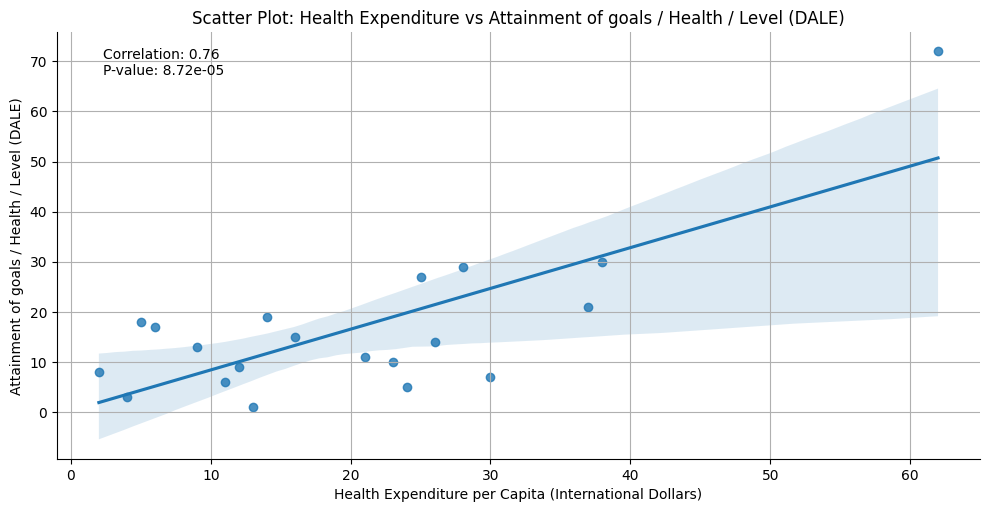

<Figure size 1000x600 with 0 Axes>

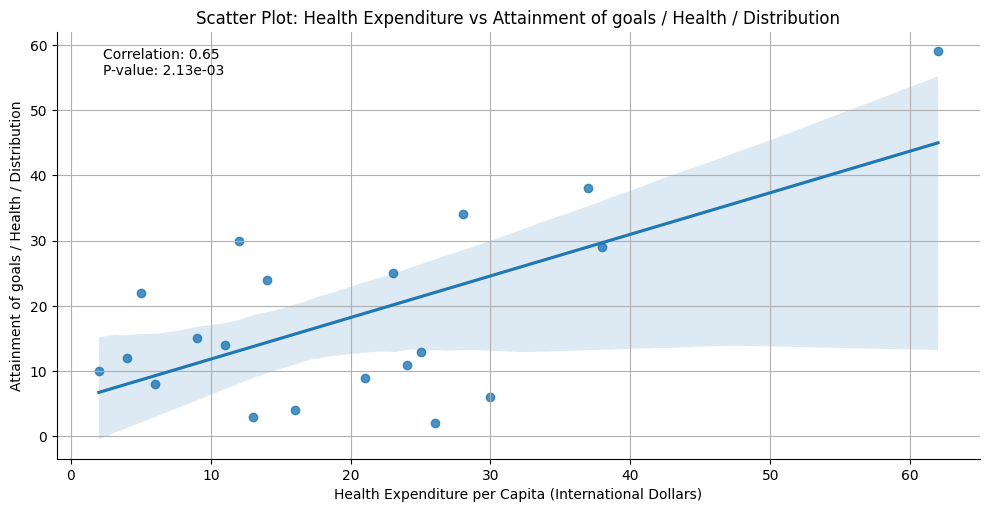

<Figure size 1000x600 with 0 Axes>

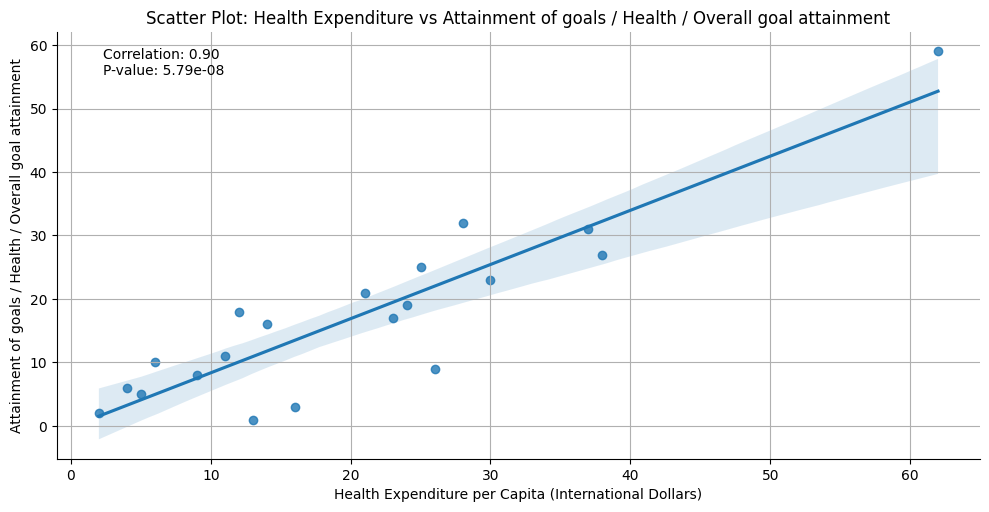

<Figure size 1000x600 with 0 Axes>

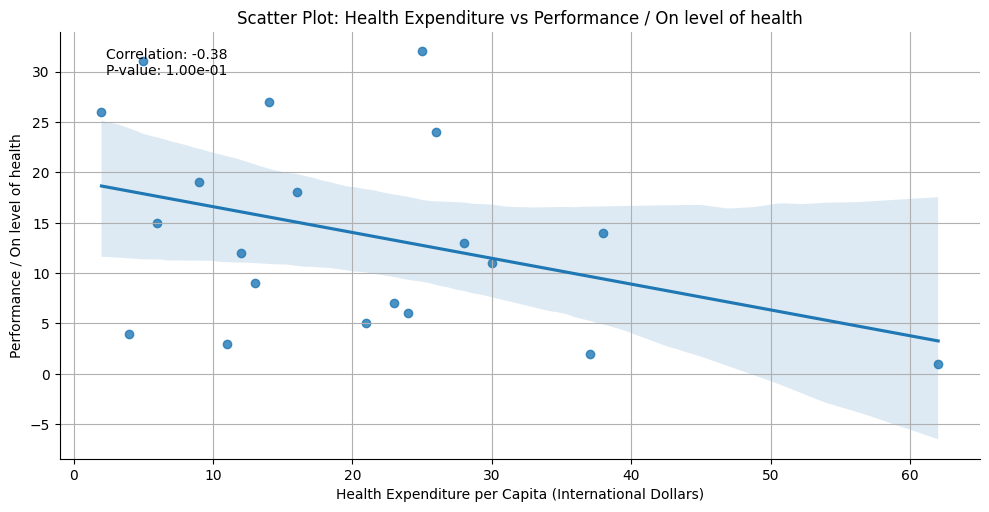

<Figure size 1000x600 with 0 Axes>

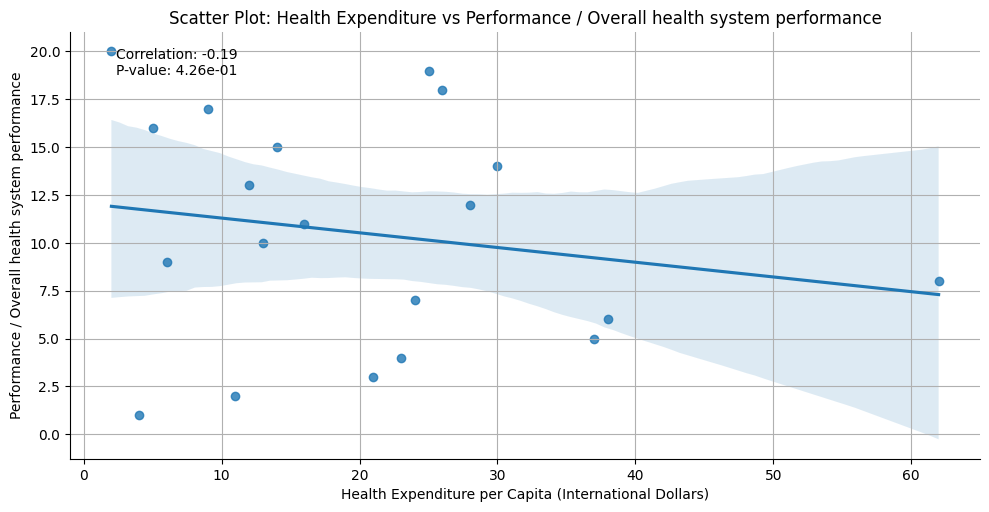

In [38]:
# Define the columns for the facet scatter plots
columns = ["Attainment of goals / Health / Level (DALE)",
           "Attainment of goals / Health / Distribution",
           "Attainment of goals / Health / Overall goal attainment",
           "Performance / On level of health",
           "Performance / Overall health system performance"]

# Create a facet scatter plot for each metric
for col in columns:
    plt.figure(figsize=(10, 6))
    g = sns.lmplot(data=top_health_sys, x="Health expenditure per capita in international dollars", y=col, height=5, aspect=2)

    plt.xlabel("Health Expenditure per Capita (International Dollars)")
    plt.ylabel(col)
    plt.title(f"Scatter Plot: Health Expenditure vs {col}")
    plt.grid(True)

    # Calculate the correlation coefficient (Pearson's r) and the p-value
    corr_coeff, p_value = pearsonr(top_health_sys["Health expenditure per capita in international dollars"], top_health_sys[col])

    # Annotate the plot with the correlation coefficient, R-value, and p-value
    annotation = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.2e}'
    g.ax.text(0.05, 0.9, annotation, transform=g.ax.transAxes)


plt.show()

Visualize Relationships Between **Health Distribution and Different Health Metrics** for the Top 50 Performing Countries in Overall Health System

<Figure size 1000x600 with 0 Axes>

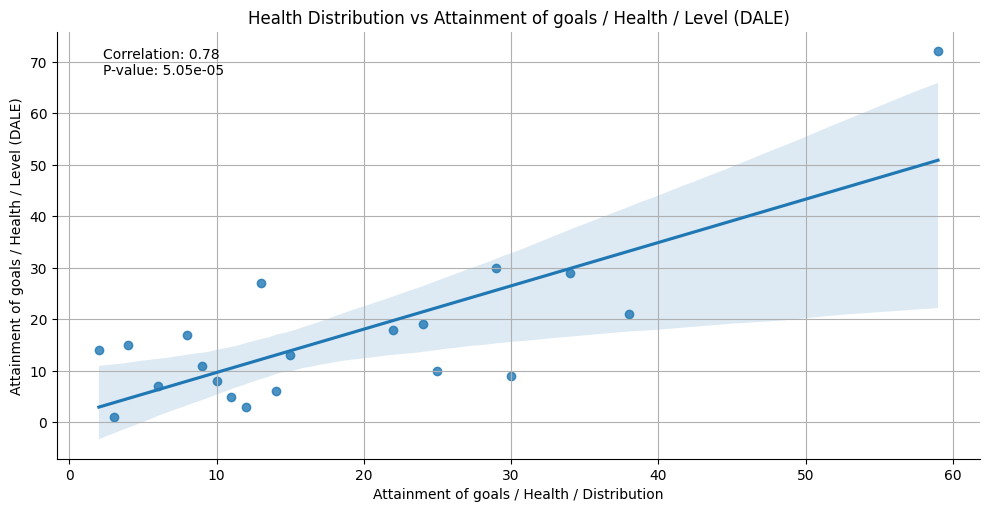

<Figure size 1000x600 with 0 Axes>

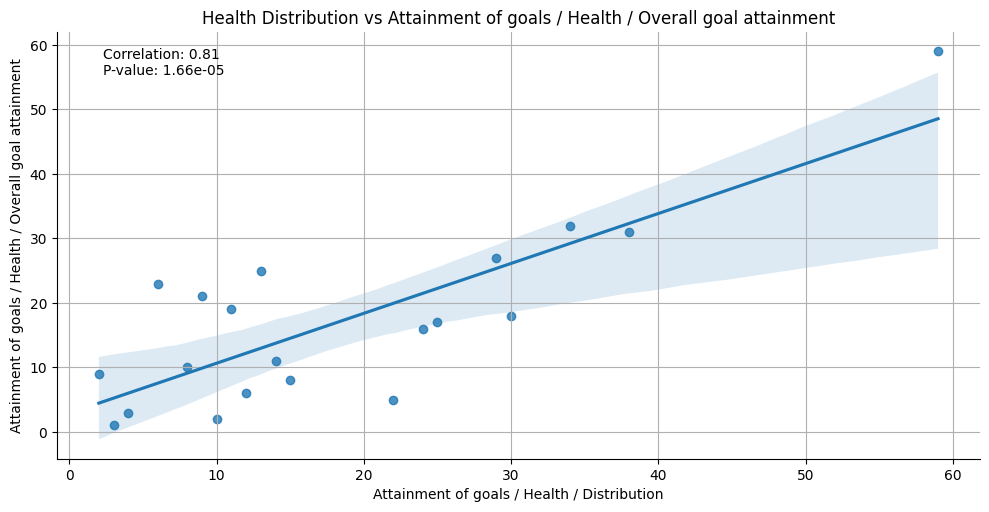

<Figure size 1000x600 with 0 Axes>

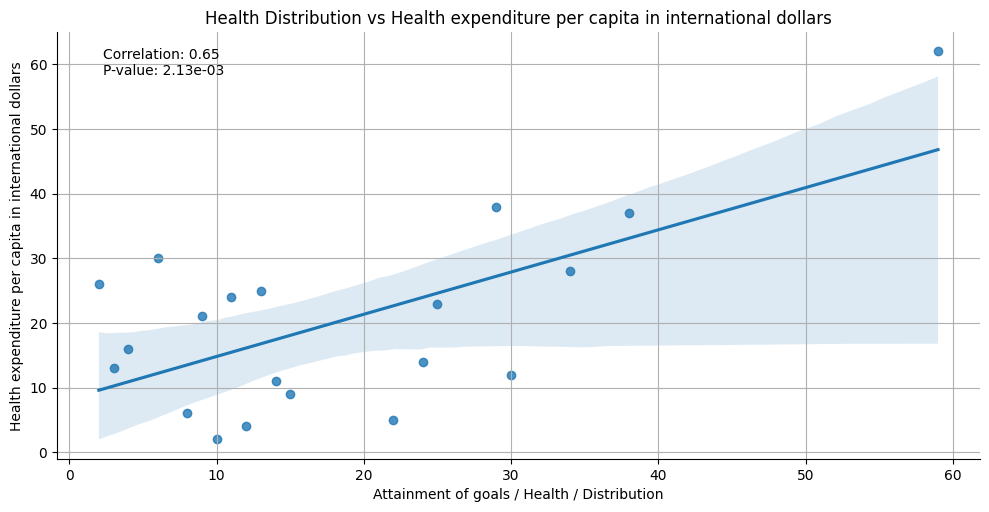

<Figure size 1000x600 with 0 Axes>

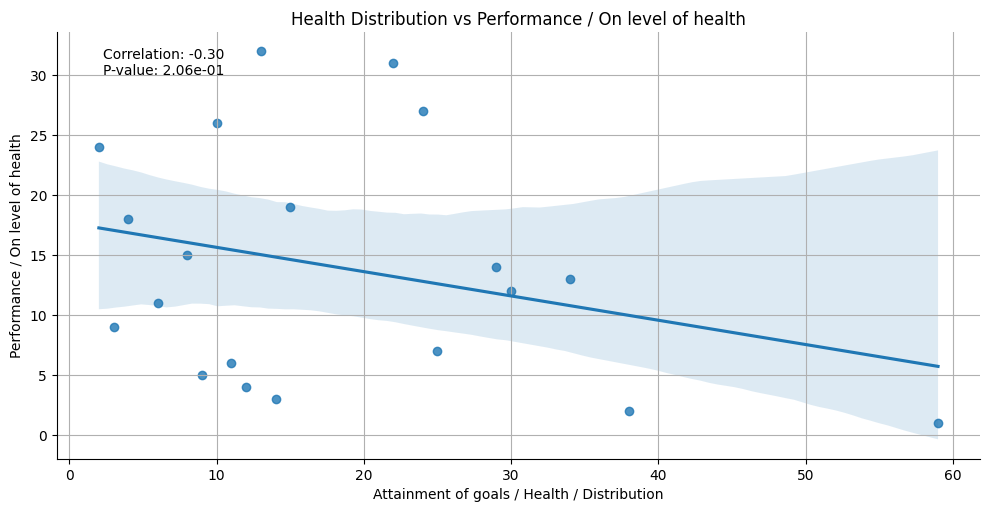

<Figure size 1000x600 with 0 Axes>

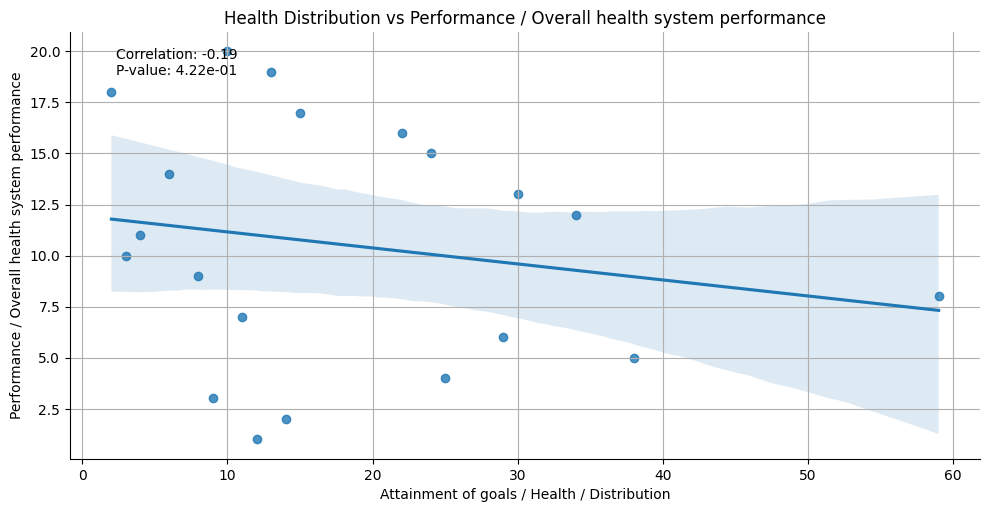

In [39]:
# Define the columns for the facet scatter plots
columns = ["Attainment of goals / Health / Level (DALE)",
           "Attainment of goals / Health / Overall goal attainment",
           "Health expenditure per capita in international dollars",
           "Performance / On level of health",
           "Performance / Overall health system performance"]

# Create a facet scatter plot for each metric
for col in columns:
    plt.figure(figsize=(10, 6))
    g = sns.lmplot(data=top_health_sys, x="Attainment of goals / Health / Distribution", y=col, height=5, aspect=2)

    plt.xlabel("Attainment of goals / Health / Distribution")
    plt.ylabel(col)
    plt.title(f"Health Distribution vs {col}")
    plt.grid(True)

    # Calculate the correlation coefficient (Pearson's r) and the p-value
    corr_coeff, p_value = pearsonr(top_health_sys["Attainment of goals / Health / Distribution"], top_health_sys[col])

    # Annotate the plot with the correlation coefficient, R-value, and p-value
    annotation = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.2e}'
    g.ax.text(0.05, 0.9, annotation, transform=g.ax.transAxes)


plt.show()

## Filter the table for **African countries**

In [40]:
# Define a list of African countries or a condition based on a specific region
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo (Brazzaville)",
    "Congo (Kinshasa)", "Cote d'Ivoire", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea",
    "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya",
    "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan",
    "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

In [41]:
# Create a new DataFrame with data for African countries
african_data = df[df["Country"].isin(african_countries)]
african_data

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
2,Algeria,44,63,56,24,45,81
4,Angola,165,178,181,164,165,181
18,Benin,157,132,143,171,136,97
22,Botswana,187,146,168,85,188,169
26,Burkina Faso,178,137,159,173,162,132
27,Burundi,179,154,161,186,171,143
29,Cameroon,156,160,163,131,172,164
32,Central African Republic,175,189,190,178,164,189
33,Chad,161,175,177,175,161,178
37,Comoros,146,143,137,165,141,118


In [42]:
african_data.describe()

,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,157.562500,151.958333,153.708333,144.437500,150.166667,145.208333
std,31.565471,32.558267,33.078860,43.532285,42.327162,42.319936
min,44.000000,63.000000,56.000000,24.000000,17.000000,29.000000
25%,150.500000,136.750000,141.750000,121.000000,142.500000,133.750000
50%,165.500000,161.500000,162.500000,162.000000,163.500000,158.500000
75%,179.250000,176.250000,177.250000,176.250000,177.250000,176.500000
max,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000


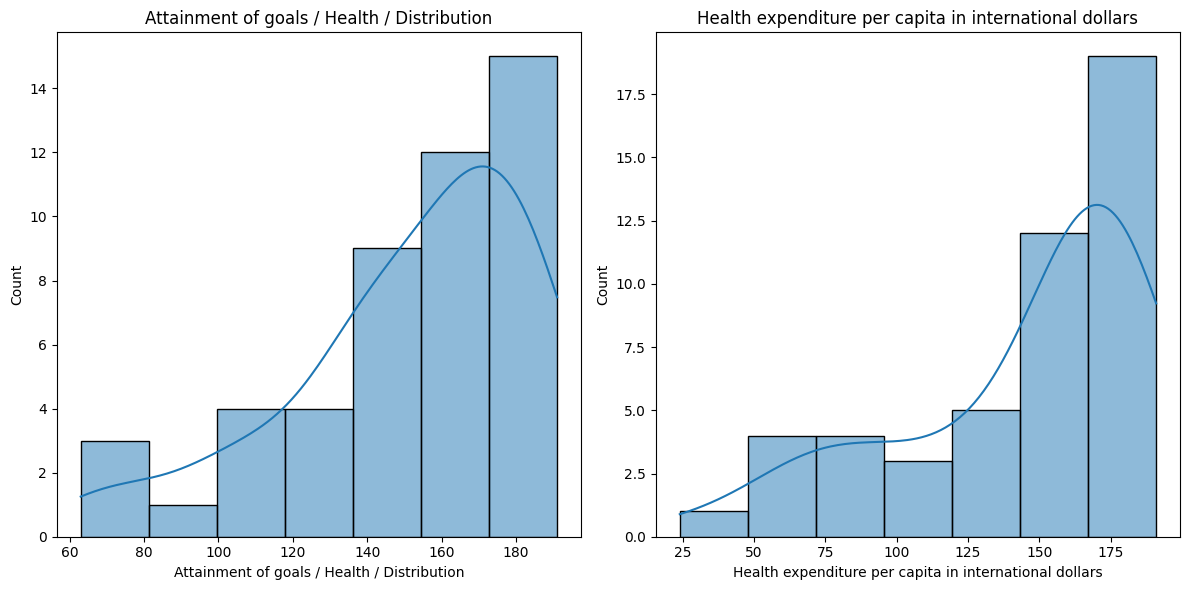

In [43]:
# Histograms
plt.figure(figsize=(12, 6))
for column in ["Attainment of goals / Health / Distribution", "Health expenditure per capita in international dollars"]:
    plt.subplot(1, 2, 1 if column == "Attainment of goals / Health / Distribution" else 2)
    sns.histplot(african_data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


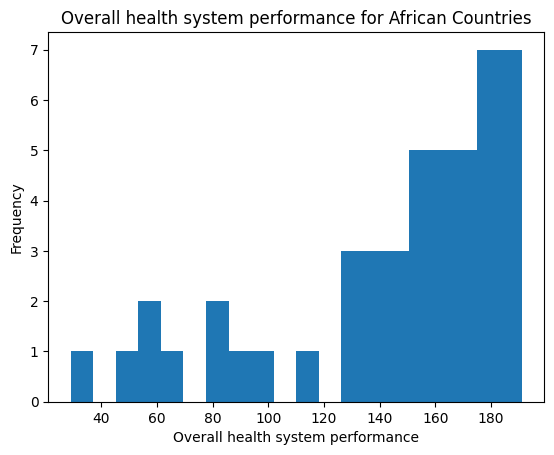

In [79]:
# Plot a histogram for a specific numerical column
plt.hist(african_data["Performance / Overall health system performance"], bins=20)
plt.xlabel("Overall health system performance")
plt.ylabel("Frequency")
plt.title("Overall health system performance for African Countries")
plt.show()

# **Correlation Analysis**

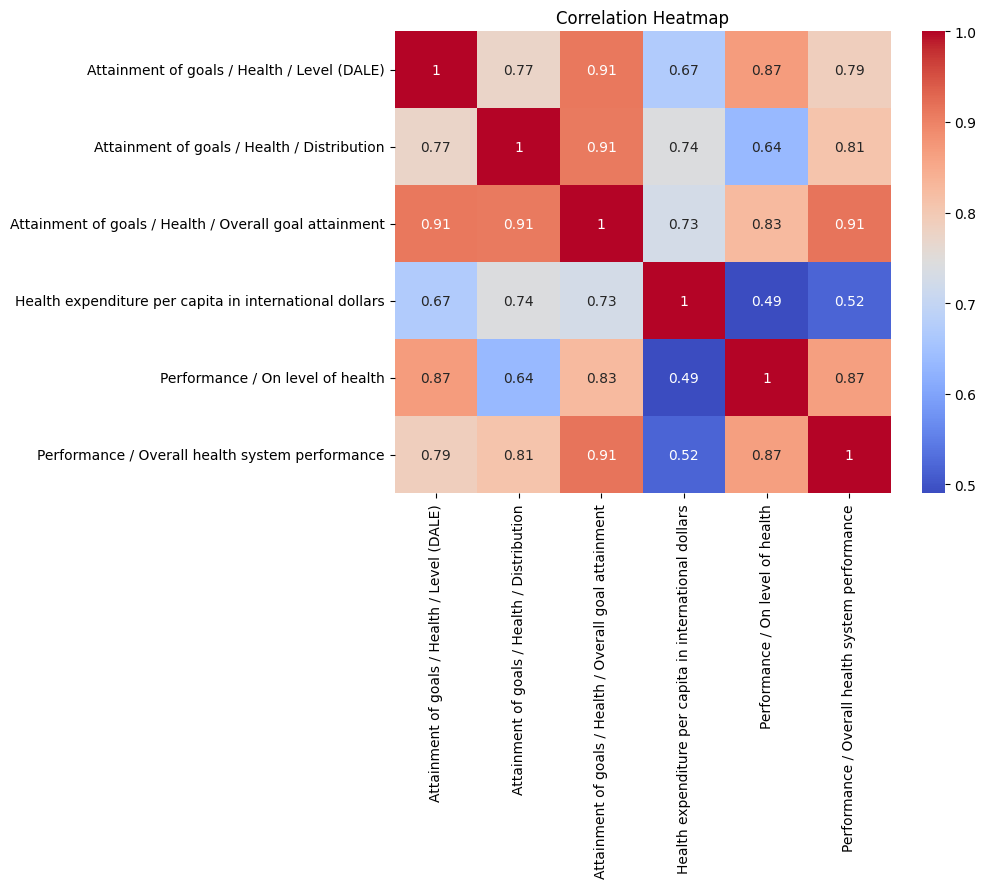

In [77]:
# Correlation heatmap
# Compute the correlation matrix with numeric columns only
correlation_matrix = african_data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.show()

# **Rankings and Top / Least Performing African Countries**

In [44]:
# 1. Ranking by "Attainment of goals / Health / Level (DALE)" column:

# Sort the DataFrame by "Attainment of goals / Health / Level (DALE)" in ascending order
sorted_by_dale = african_data.sort_values(by="Attainment of goals / Health / Level (DALE)")

# Display the top performers
print("Top Performers by DALE:")
sorted_by_dale.head(10)

Top Performers by DALE:


,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
2,Algeria,44,63,56,24,45,81
109,Mauritius,78,77,90,69,113,84
173,Tunisia,90,114,77,79,46,52
97,Libya,107,102,97,84,94,87
150,Seychelles,108,73,83,52,83,56
114,Morocco,110,111,94,99,17,29
51,Egypt,115,141,110,115,43,63
147,Sao Tome and Principe,132,139,138,167,117,133
62,Gambia,143,155,153,158,109,146
61,Gabon,144,136,141,95,143,139


In [45]:
# 2. Ranking by "Attainment of goals / Health / Overall goal attainment" column:

# Sort the DataFrame by "Attainment of goals / Health / Overall goal attainment" in descending order
sorted_by_goal_attainment = african_data.sort_values(by="Attainment of goals / Health / Overall goal attainment", ascending=True)

# Display the top performers
print("Top Performers by Overall Goal Attainment:")
sorted_by_goal_attainment.head(10)

Top Performers by Overall Goal Attainment:


,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
2,Algeria,44,63,56,24,45,81
173,Tunisia,90,114,77,79,46,52
150,Seychelles,108,73,83,52,83,56
109,Mauritius,78,77,90,69,113,84
114,Morocco,110,111,94,99,17,29
97,Libya,107,102,97,84,94,87
51,Egypt,115,141,110,115,43,63
149,Senegal,151,105,118,143,132,59
37,Comoros,146,143,137,165,141,118
147,Sao Tome and Principe,132,139,138,167,117,133


In [46]:
# 3. Ranking by "Health expenditure per capita in international dollars" column:

 #Sort the DataFrame by "Health expenditure per capita in international dollars" in descending order
sorted_by_expenditure = african_data.sort_values(by="Health expenditure per capita in international dollars", ascending=True)

# Display the top performers
print("Top Performers by Health Expenditure:")
sorted_by_expenditure.head(10)


Top Performers by Health Expenditure:


,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
2,Algeria,44,63,56,24,45,81
150,Seychelles,108,73,83,52,83,56
157,South Africa,160,128,151,57,182,175
117,Namibia,177,173,165,66,189,168
109,Mauritius,78,77,90,69,113,84
173,Tunisia,90,114,77,79,46,52
97,Libya,107,102,97,84,94,87
22,Botswana,187,146,168,85,188,169
61,Gabon,144,136,141,95,143,139
114,Morocco,110,111,94,99,17,29


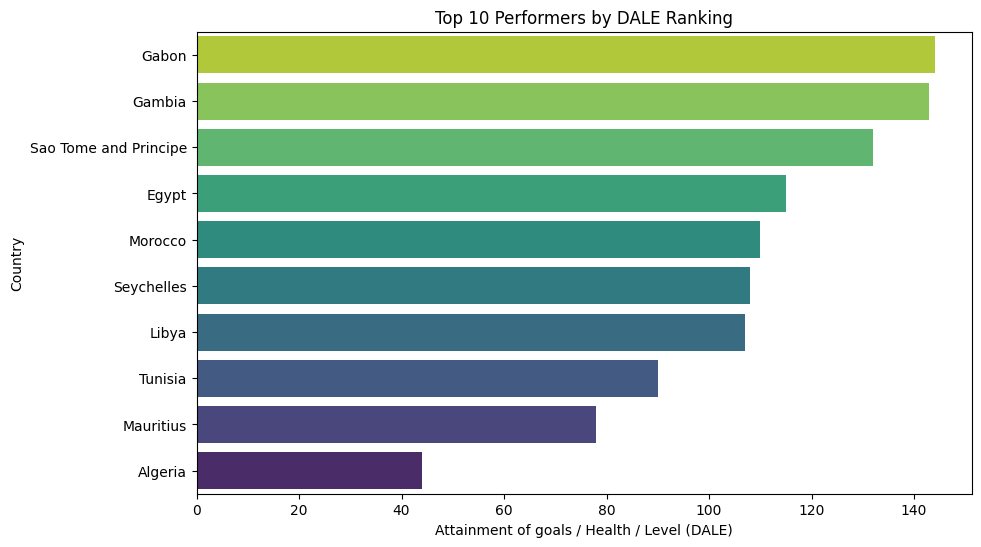

In [47]:
# Sort the DataFrame by "Attainment of goals / Health / Level (DALE)" in ascending order
sorted_by_dale = african_data.sort_values(by="Attainment of goals / Health / Level (DALE)")

# Select the top N performers (e.g., top 10)
top_performers = sorted_by_dale.head(10)

# Create a bar chart to highlight the rankings
plt.figure(figsize=(10, 6))
sns.barplot(x="Attainment of goals / Health / Level (DALE)", y="Country", data=top_performers, palette="viridis")
plt.xlabel("Attainment of goals / Health / Level (DALE)")
plt.ylabel("Country")
plt.title("Top 10 Performers by DALE Ranking")
plt.gca().invert_yaxis()  # Invert the y-axis for highest ranking at the top
plt.show()

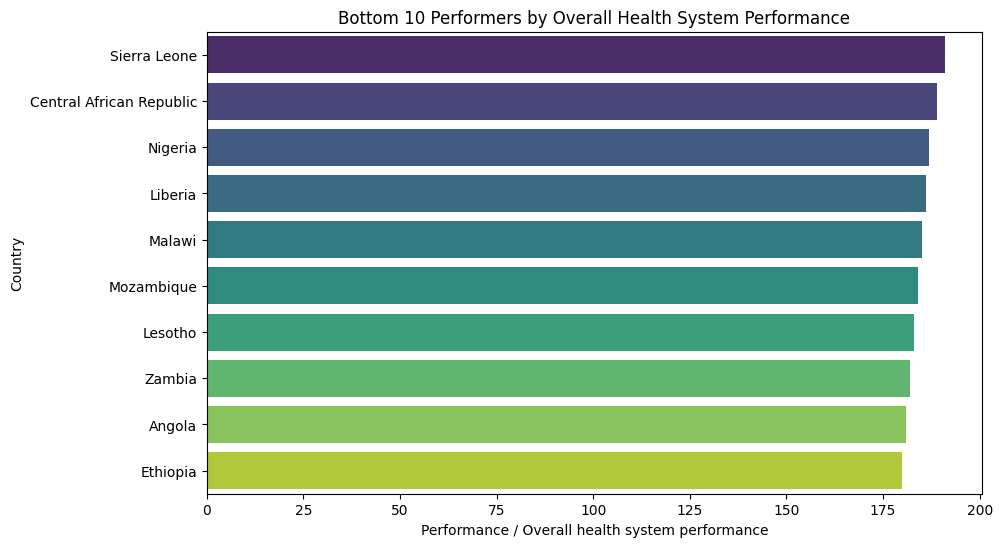

In [50]:
# Sort the DataFrame by "Performance / Overall health system performance" in descending order
sorted_by_performance = african_data.sort_values(by="Performance / Overall health system performance", ascending=False)

# Select the bottom N performers (e.g., bottom 10)
bottom_performers = sorted_by_performance.head(10)

# Create a bar plot to highlight the rankings of the least performers
plt.figure(figsize=(10, 6))
sns.barplot(x="Performance / Overall health system performance", y="Country", data=bottom_performers, palette="viridis")
plt.xlabel("Performance / Overall health system performance")
plt.ylabel("Country")
plt.title("Bottom 10 Performers by Overall Health System Performance")

plt.show()

# **Geographical Analysis**

In [52]:
# Load the geospatial data for countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the data to include only African countries
african_countries_geo = world[world['continent'] == 'Africa']
african_countries_geo

<ipython-input-52-8204fec279ff>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [53]:
#Merge Data

merged_data = african_countries_geo.merge(african_data, left_on='name', right_on='Country')
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,176,172,158,174,180,156
1,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",Somalia,173,179,189,191,154,179
2,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",Kenya,162,135,142,152,178,140
3,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",Sudan,154,159,148,169,149,134
4,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",Chad,161,175,177,175,161,178
5,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",South Africa,160,128,151,57,182,175
6,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257...",Lesotho,171,164,173,123,186,183
7,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,184,98,147,110,191,155
8,2303697.0,Africa,Botswana,BWA,18340,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...",Botswana,187,146,168,85,188,169
9,2494530.0,Africa,Namibia,NAM,12366,"POLYGON ((19.89577 -24.76779, 19.89473 -28.461...",Namibia,177,173,165,66,189,168


In [54]:
# Create a Folium map centered on Africa
africa_map = folium.Map(location=[-2, 20], zoom_start=3)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['Country', 'Attainment of goals / Health / Level (DALE)'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Attainment of goals / Health / Level (DALE)',
).add_to(africa_map)

# Display the map
africa_map

Visualize Relationships Between **Health Expenditure and Different Health Metrics** for the **African Countries**

<Figure size 1000x600 with 0 Axes>

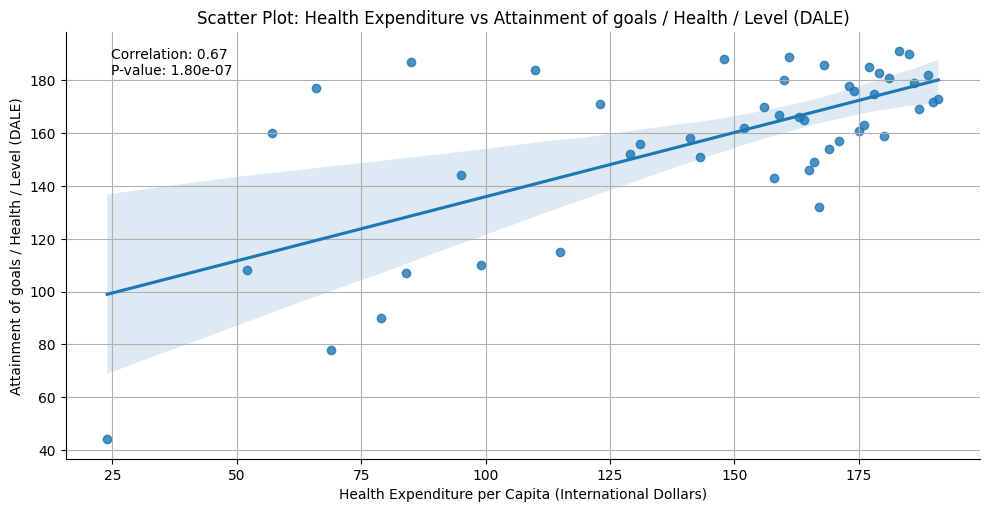

<Figure size 1000x600 with 0 Axes>

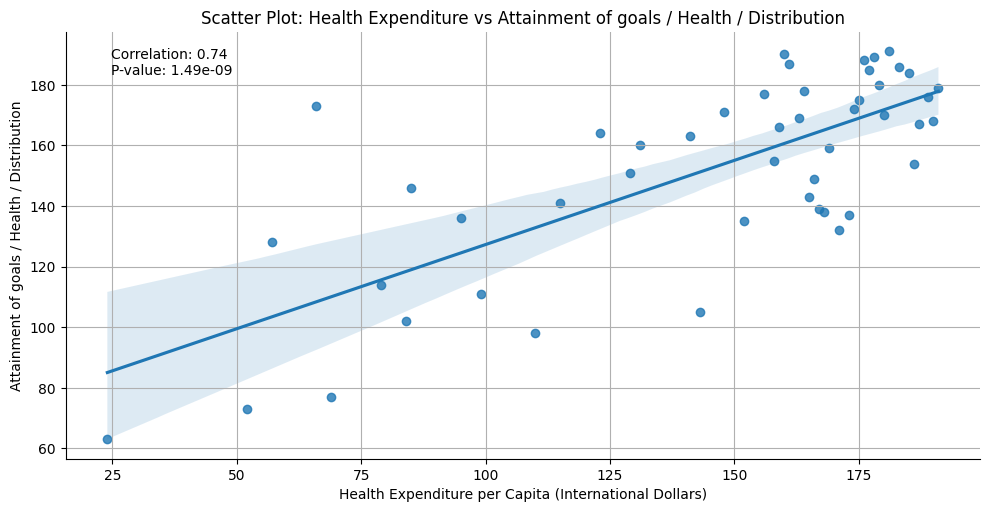

<Figure size 1000x600 with 0 Axes>

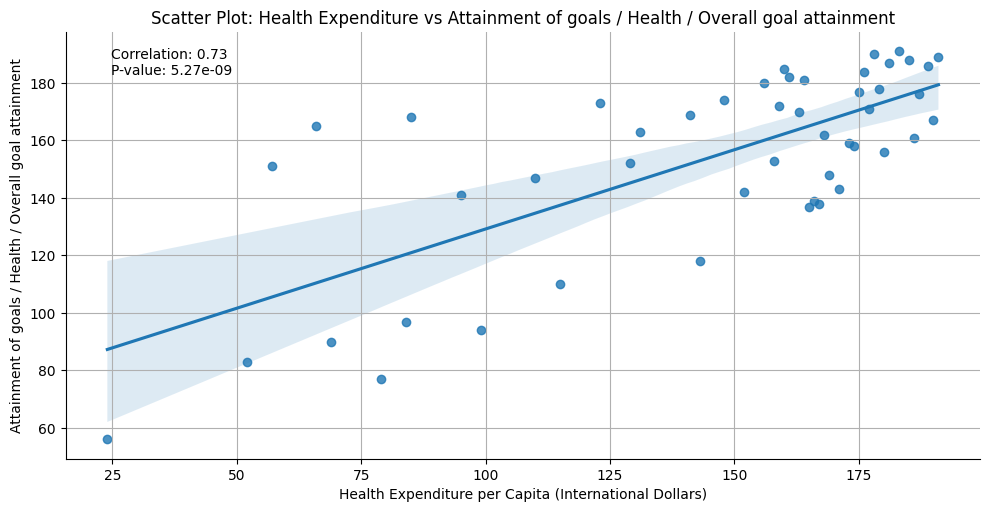

<Figure size 1000x600 with 0 Axes>

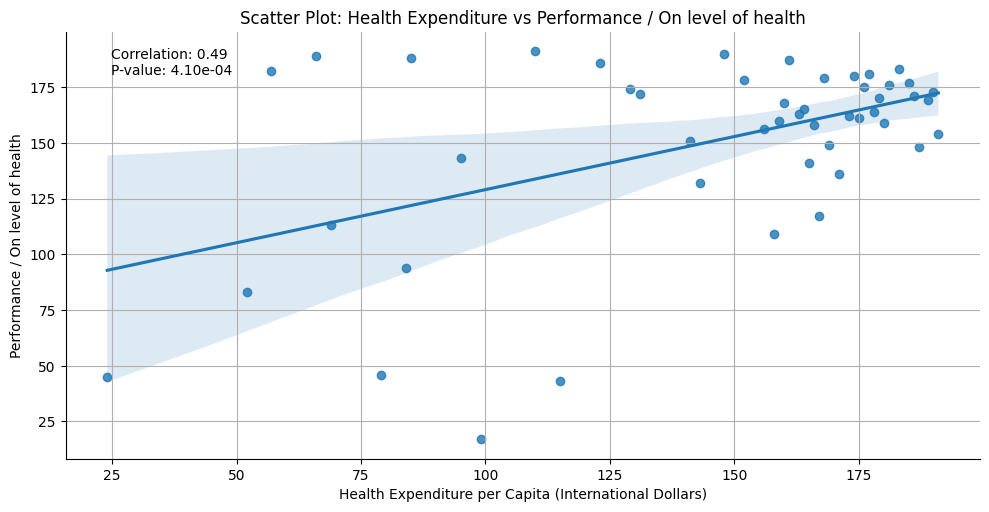

<Figure size 1000x600 with 0 Axes>

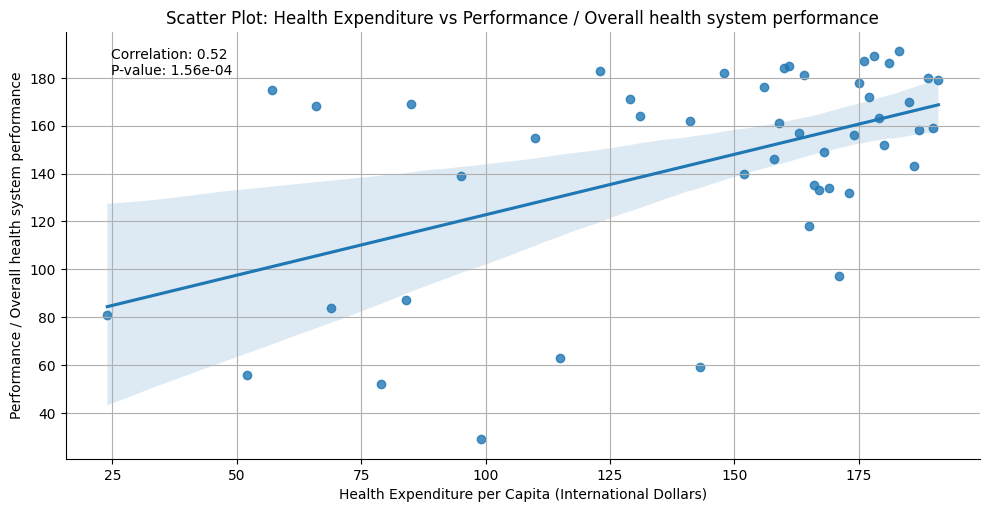

In [57]:
# Define the columns for the facet scatter plots
columns = ["Attainment of goals / Health / Level (DALE)",
           "Attainment of goals / Health / Distribution",
           "Attainment of goals / Health / Overall goal attainment",
           "Performance / On level of health",
           "Performance / Overall health system performance"]

# Create a facet scatter plot for each metric
for col in columns:
    plt.figure(figsize=(10, 6))
    g = sns.lmplot(data=african_data, x="Health expenditure per capita in international dollars", y=col, height=5, aspect=2)

    # Calculate the correlation coefficient (Pearson's r) and the p-value
    corr_coeff, p_value = pearsonr(african_data["Health expenditure per capita in international dollars"], african_data[col])

    # Annotate the plot with the correlation coefficient, R-value, and p-value
    annotation = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.2e}'
    g.ax.text(0.05, 0.9, annotation, transform=g.ax.transAxes)

    plt.xlabel("Health Expenditure per Capita (International Dollars)")
    plt.ylabel(col)
    plt.title(f"Scatter Plot: Health Expenditure vs {col}")
    plt.grid(True)

plt.show()


Visualize Relationships Between **Health Distribution and Different Health Metrics** for **African Countries**

In [58]:
# Sort the DataFrame in descending order by the "Attainment of goals / Health / Distribution" column
sorted_african_dist = african_data.sort_values(by="Attainment of goals / Health / Distribution", ascending=False)
sorted_african_dist.head(20)

,Country,Attainment of goals / Health / Level (DALE),Attainment of goals / Health / Distribution,Attainment of goals / Health / Overall goal attainment,Health expenditure per capita in international dollars,Performance / On level of health,Performance / Overall health system performance
96,Liberia,181,191,187,181,176,186
115,Mozambique,180,190,185,160,168,184
32,Central African Republic,175,189,190,178,164,189
124,Nigeria,163,188,184,176,175,187
102,Malawi,189,187,182,161,187,185
151,Sierra Leone,191,186,191,183,183,191
141,Rwanda,185,185,171,177,181,172
123,Niger,190,184,188,185,177,170
105,Mali,183,180,178,179,170,163
156,Somalia,173,179,189,191,154,179


<Figure size 1000x600 with 0 Axes>

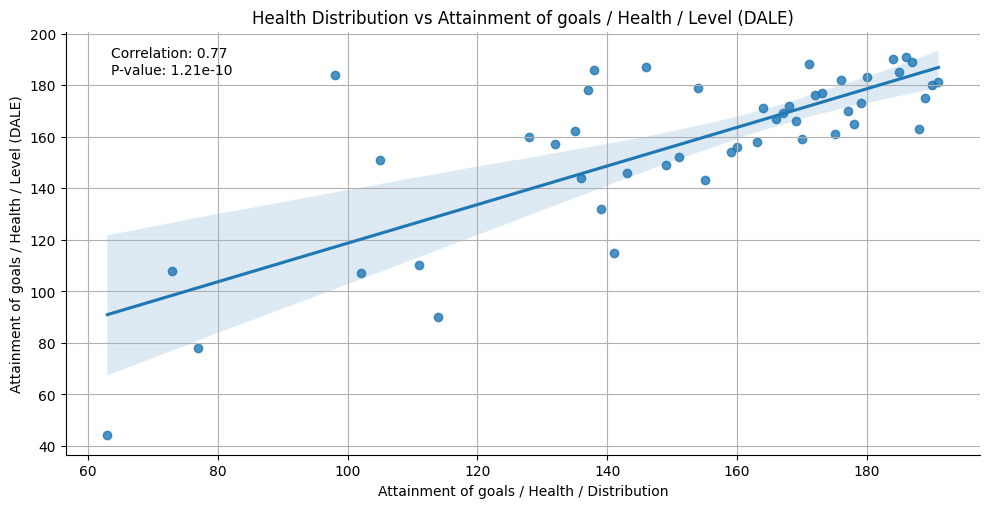

<Figure size 1000x600 with 0 Axes>

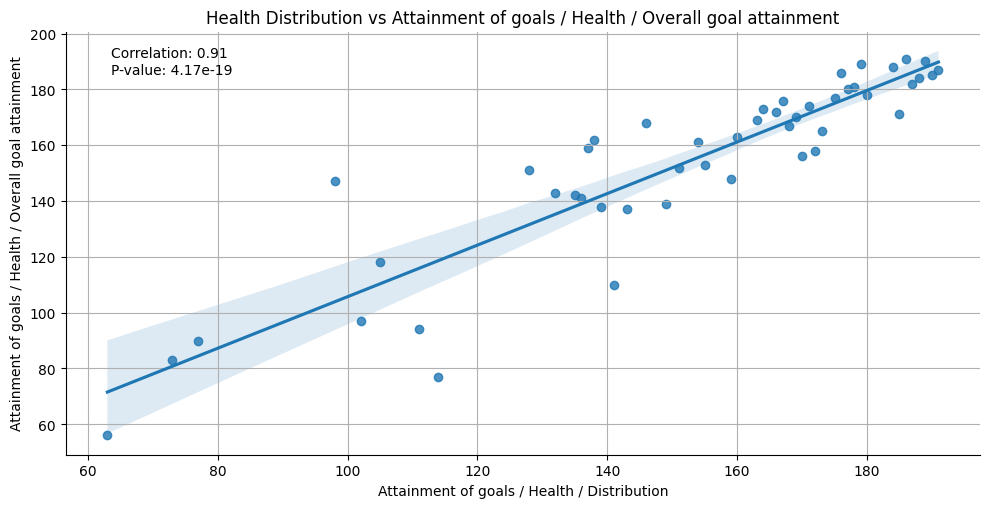

<Figure size 1000x600 with 0 Axes>

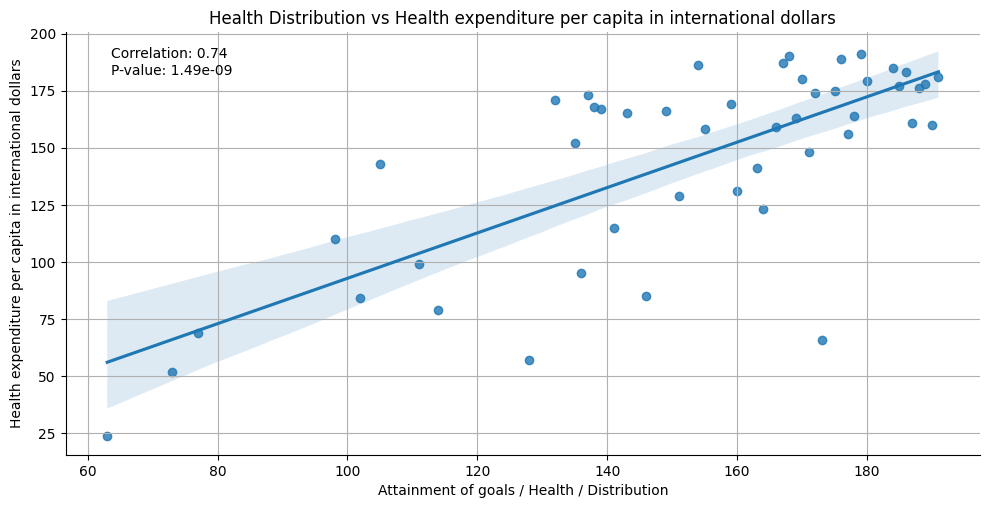

<Figure size 1000x600 with 0 Axes>

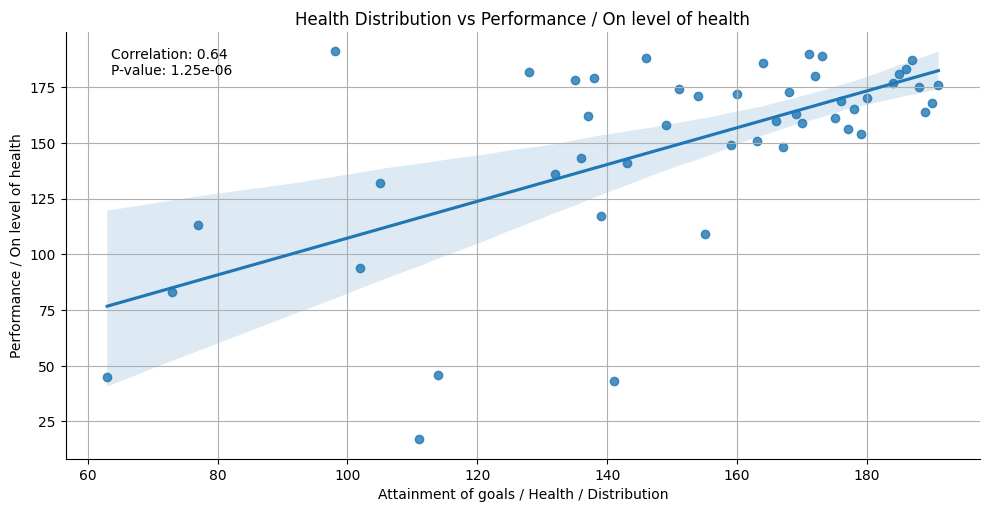

<Figure size 1000x600 with 0 Axes>

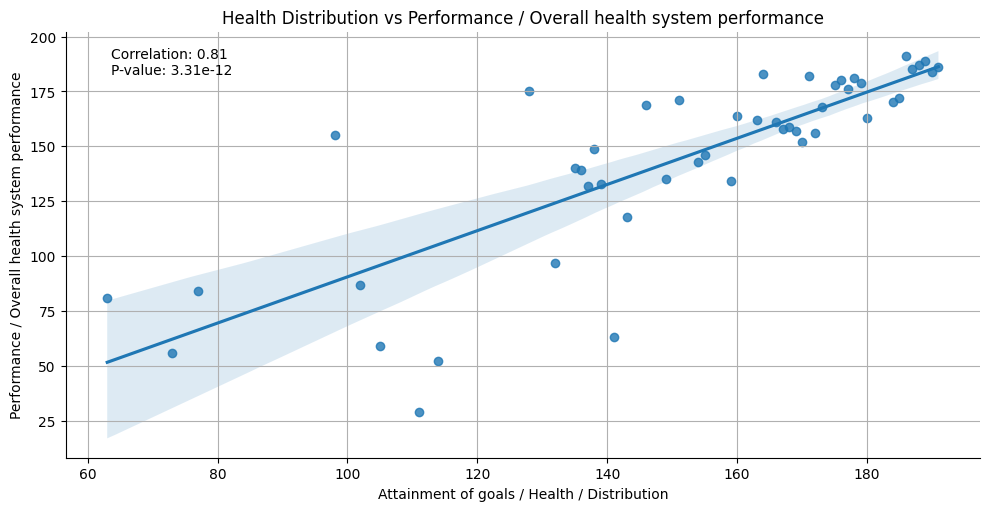

In [60]:
# Relationship Between African Countries Health Distribution and Health Metrics

# Define the columns for the facet scatter plots
columns = ["Attainment of goals / Health / Level (DALE)",
           "Attainment of goals / Health / Overall goal attainment",
           "Health expenditure per capita in international dollars",
           "Performance / On level of health",
           "Performance / Overall health system performance"]

# Create a facet scatter plot for each metric
for col in columns:
    plt.figure(figsize=(10, 6))
    g = sns.lmplot(sorted_african_dist, x="Attainment of goals / Health / Distribution", y=col, height=5, aspect=2)

    plt.xlabel("Attainment of goals / Health / Distribution")
    plt.ylabel(col)
    plt.title(f"Health Distribution vs {col}")
    plt.grid(True)

    # Calculate the correlation coefficient (Pearson's r) and the p-value
    corr_coeff, p_value = pearsonr(sorted_african_dist["Attainment of goals / Health / Distribution"], sorted_african_dist[col])

    # Annotate the plot with the correlation coefficient, R-value, and p-value
    annotation = f'Correlation: {corr_coeff:.2f}\nP-value: {p_value:.2e}'
    g.ax.text(0.05, 0.9, annotation, transform=g.ax.transAxes)


plt.show()